In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco_customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# **Data Inspection**

In [3]:
# Checking shape of data
df.shape

(7043, 33)

In [4]:
# Checking dtypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
# Checking Stats summary
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [6]:
# Checking missing values
df.isnull().sum()
# only "Churn Reason" has missing values (1574 missing)

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [7]:
# Checking Churn reasons based on data
print(df['Churn Reason'].value_counts())

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [8]:
df['Churn Reason'].value_counts(normalize=True) * 100

,proportion
Churn Reason,
Attitude of support person,10.272873
Competitor offered higher download speeds,10.112360
Competitor offered more data,8.667737
Don't know,8.239700
Competitor made better offer,7.490637
Attitude of service provider,7.223114
Competitor had better devices,6.955591
Network reliability,5.510968
Product dissatisfaction,5.457464


'Top churn reasons are:\n1) Attitude of support person (~10%)\n2) Competitor offered higher download speeds(~10%)'

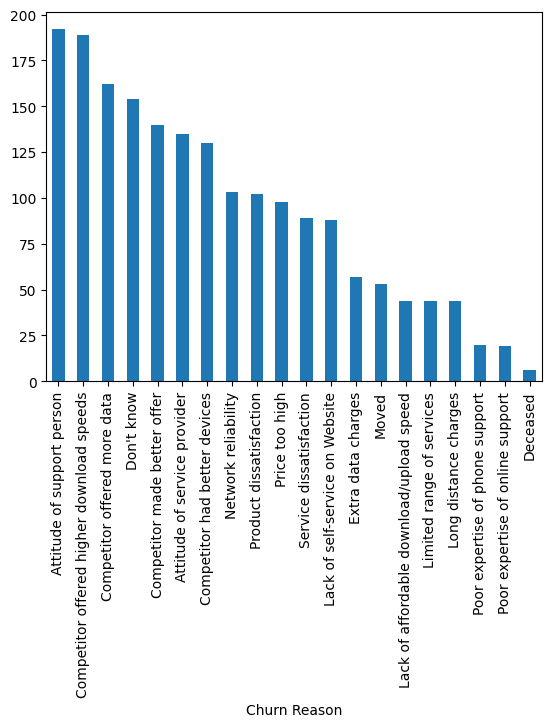

In [9]:
df['Churn Reason'].value_counts().plot(kind='bar')
'''Top churn reasons are:
1) Attitude of support person (~10%)
2) Competitor offered higher download speeds(~10%)'''

In [10]:
# Checking duplicate rows
df.duplicated().sum()
# No duplicate rows in dataset

np.int64(0)

In [11]:
# Checking initial churn
(df['Churn Label'].value_counts(normalize=True) * 100).round(1)

,proportion
Churn Label,
No,73.5
Yes,26.5


Initial analysis showed around 26.5% churn, indicating a significant business risk.

# **Data Cleaning & Preprocessing**

In [12]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [13]:
# Converting Total Charges from object to numeric type
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [14]:
# Filling nan in "Total Charges" with 0 since those customers have "Tenure Months" = 0 but "Contract" = Two Years
df['Total Charges'] = df['Total Charges'].fillna(0)

In [15]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [16]:
df[df['Tenure Months'] == 0]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,0.0,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,0.0,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,0.0,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,0.0,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,0.0,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,0.0,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,0.0,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,0.0,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,0.0,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,0.0,No,0,44,2342,NaN


# **Exploratory Data Analysis**

## Target Variable Analysis (Churn Rate)

In [17]:
# Checking churn rate
(df['Churn Label'].value_counts(normalize=True) * 100).round(1)

,proportion
Churn Label,
No,73.5
Yes,26.5


In [18]:
print('Total customers with churn score of 100%  :', (df['Churn Score']==100).sum())
print('Total customers with churn score of 0%  :', (df['Churn Score']==0).sum())

Total customers with churn score of 100%  : 50
Total customers with churn score of 0%  : 0


26.5% of customers churned, indicating a high retention risk.

## Demographic Analysis vs Churn

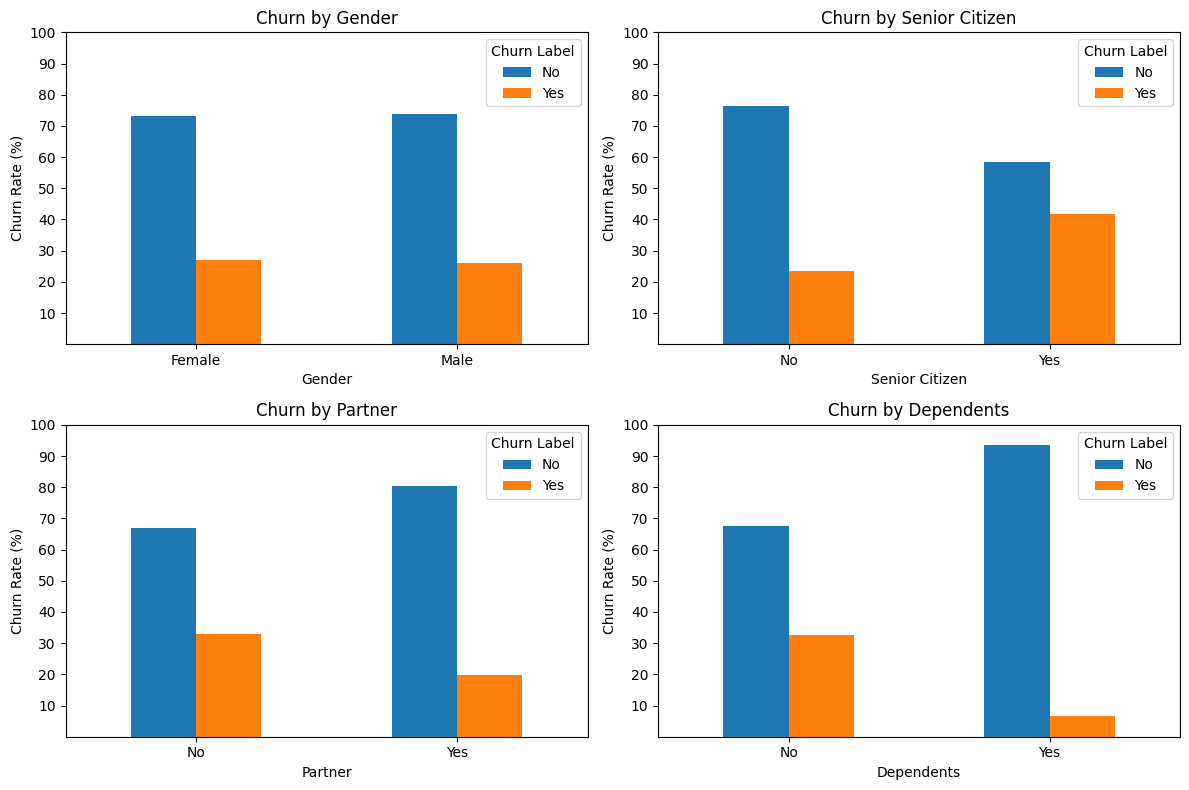

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

((pd.crosstab(df['Gender'], df['Churn Label'], normalize='index') * 100)
 .round(2)
 .plot(kind='bar', ax=axes[0,0]))
axes[0,0].set_title('Churn by Gender')
axes[0,0].set_ylabel('Churn Rate (%)')
axes[0,0].set_yticks(range(10,101,10))
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=0)

((pd.crosstab(df['Senior Citizen'], df['Churn Label'], normalize='index') * 100)
 .round(2)
 .plot(kind='bar', ax=axes[0,1]))
axes[0,1].set_title('Churn by Senior Citizen')
axes[0,1].set_ylabel('Churn Rate (%)')
axes[0,1].set_yticks(range(10,101,10))
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=0)

((pd.crosstab(df['Partner'], df['Churn Label'], normalize='index') * 100)
 .round(2)
 .plot(kind='bar', ax=axes[1,0]))
axes[1,0].set_title('Churn by Partner')
axes[1,0].set_ylabel('Churn Rate (%)')
axes[1,0].set_yticks(range(10,101,10))
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=0)

((pd.crosstab(df['Dependents'], df['Churn Label'], normalize='index') * 100)
 .round(2)
 .plot(kind='bar', ax=axes[1,1]))
axes[1,1].set_title('Churn by Dependents')
axes[1,1].set_ylabel('Churn Rate (%)')
axes[1,1].set_yticks(range(10,101,10))
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=0)


plt.tight_layout()
plt.show()


**Insights**

*   Young people, partner and dependents don't churn significantly.
*   The churn rates for Females and Males are almost identical. So no need to focus here.

## Tenure Analysis

In [20]:
bins = [0,6,12,24,36,48,60,72]
labels = ['0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years']
df['Tenure Months Buckets'] = pd.cut(df['Tenure Months'], bins=bins, labels=labels, right=False)

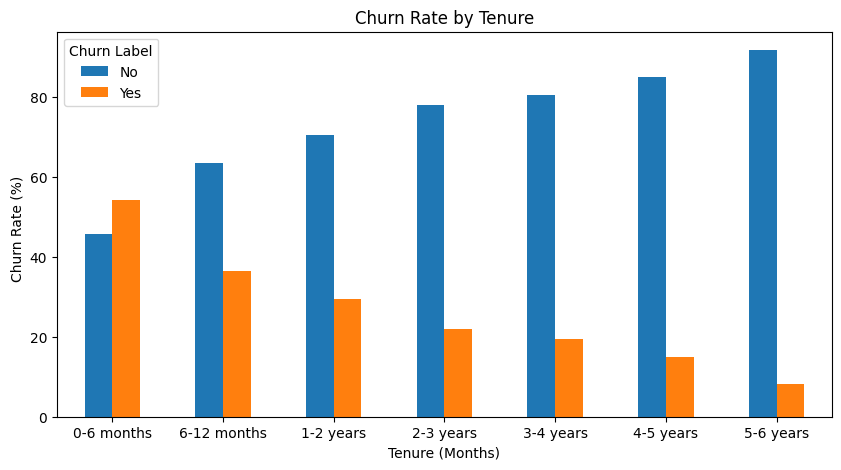

In [21]:
(((pd.crosstab(df['Tenure Months Buckets'], df['Churn Label'], normalize='index')) * 100 ).round(3)).plot(kind='bar', figsize=(10,5))
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate (%)  ')
plt.xlabel('Tenure (Months)')
plt.xticks(rotation=0)
plt.show()

Churn Rate is at peak (~55%) in initial 6 months.

Company should prioritize them and offer rewards for long-term loyalty.

## Contract Type vs Churn

In [22]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

Text(0.5, 0, 'Contract Type')

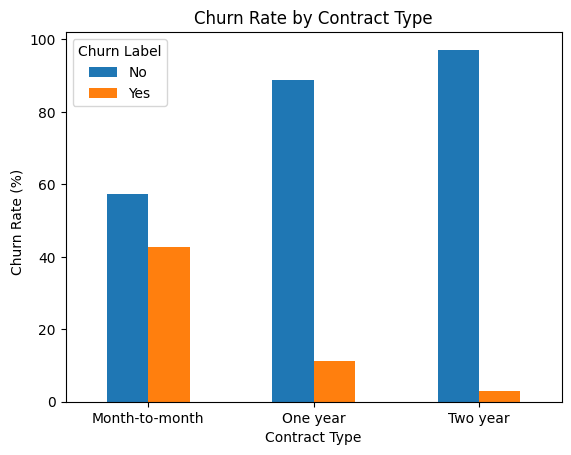

In [23]:
((pd.crosstab(df['Contract'], df['Churn Label'], normalize='index') * 100).round(3)).plot( kind='bar')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)  ')
plt.xticks(rotation=0)
plt.xlabel('Contract Type')

Similar observations as in tenure.

Churn Rate is ~40% in month-to-month contract type.

Incentivize Long-Term Contracts: To reduce the high churn seen in month-to-month plans, offer discounts or exclusive perks to encourage customers to switch to 1 or 2 year commitments.

## Billing & Charges Analysis

In [24]:
df['Monthly Charges Buckets'] = pd.cut(df['Monthly Charges'],
                                       bins=[18,40,60,80,100,120],
                                       labels=['Very Low (<40)', 'Low (<60)', 'Medium (<80)', 'High (<100)', 'Very High (<120)'],
                                       right=True)
df['Total Charges Bucket'] = pd.cut(df['Total Charges'],
                                       bins=[0,2000,4000,6000,8000,9000],
                                       labels=['<2000', '<4000','<6000','<8000','<9000'],
                                       right=True)

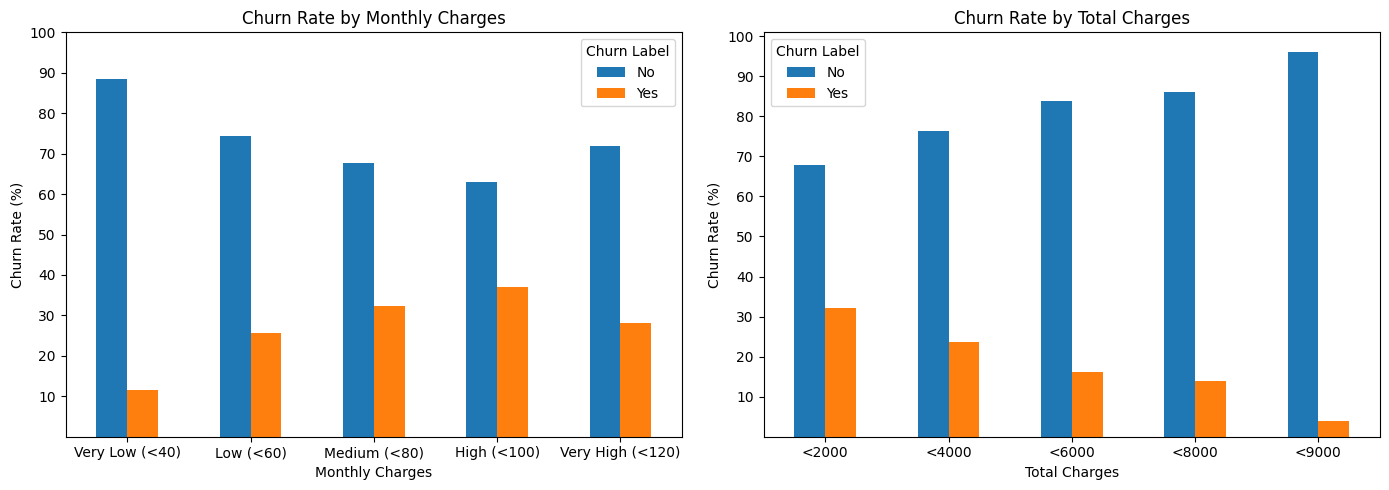

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn Rate by Monthly Charges
(pd.crosstab(df['Monthly Charges Buckets'],df['Churn Label'],normalize='index') * 100).round(2).plot(kind='bar',ax=axes[0])

axes[0].set_title('Churn Rate by Monthly Charges')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_yticks(range(10,101,10))
axes[0].tick_params(axis='x', rotation=0)

# Churn Rate by Total Charges
(pd.crosstab(df['Total Charges Bucket'],df['Churn Label'],normalize='index') * 100).round(2).plot(kind='bar',ax=axes[1])

axes[1].set_title('Churn Rate by Total Charges')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xlabel('Total Charges')
axes[1].set_yticks(range(10,101,10))
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


**Monthly Charges:**

1) Churn increases as monthly charges rise, peaking in the "High (<100)" bracket at nearly 40%.

\
**Total Charges:**

1) **Accumulated Value**: The churn rate is highest for those with the lowest total lifetime spend (under 2000).

2) **Inverse Relationship**: As total charges accumulate over time, the churn rate drops consistently. Customers with over 9000 in total charges show the highest retention, reflecting a stable, long-term customer base.

## Payment Method vs Churn

In [26]:
df['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

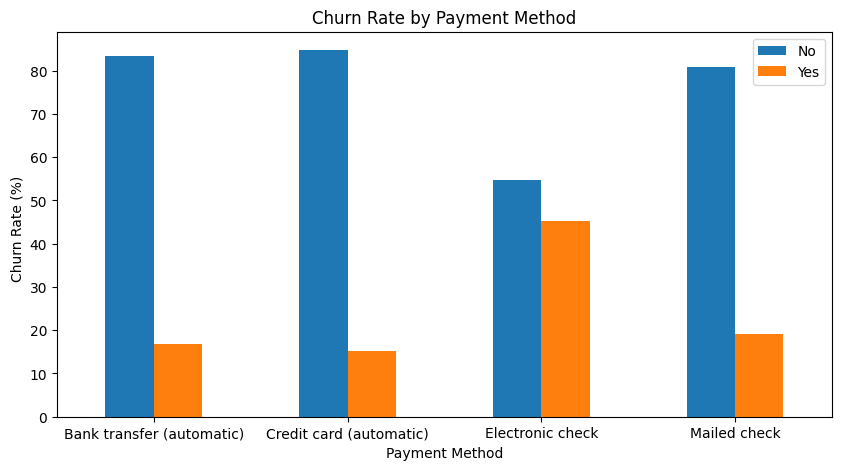

In [27]:
((pd.crosstab(df['Payment Method'], df['Churn Label'], normalize='index') * 100).round(3)).plot( kind='bar', figsize=(10,5))
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate (%)  ')
plt.xticks(rotation=0)
plt.legend(loc='upper right')

Payment friction or behavior appears to be a major signal for attrition.

**Manual vs. Automatic**: Customers using Electronic checks show a disproportionately high churn rate of approximately ~45%.

**Stability in Automation**: Those on Credit card or Bank transfer (automatic) are significantly more loyal, with churn rates dropping below ~20%.

## Service Usage vs Churn

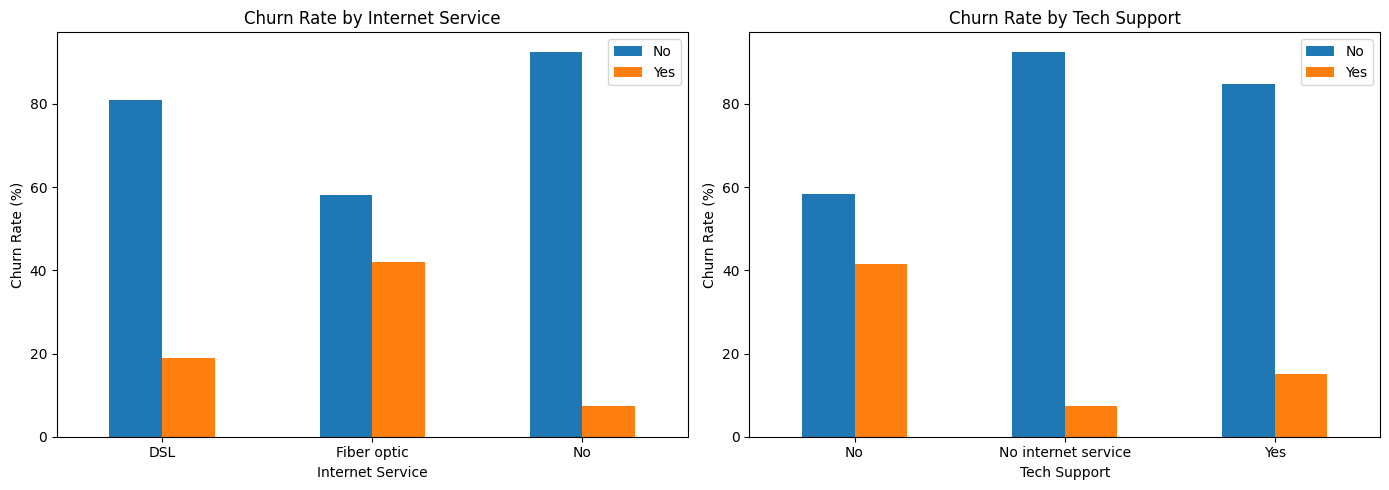

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

(pd.crosstab(df['Internet Service'], df['Churn Label'], normalize='index') * 100).round(3).plot(kind='bar',ax=axes[0])
axes[0].set_title('Churn Rate by Internet Service')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(loc='upper right')


(pd.crosstab(df['Tech Support'], df['Churn Label'], normalize='index') * 100).round(3).plot(kind='bar',ax=axes[1])
axes[1].set_title('Churn Rate by Tech Support')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

Customers using Fiber optic internet churn at a much higher rate (over 40%) compared to DSL users.

Those without Tech Support are significantly more likely to leave than those who utilize it.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

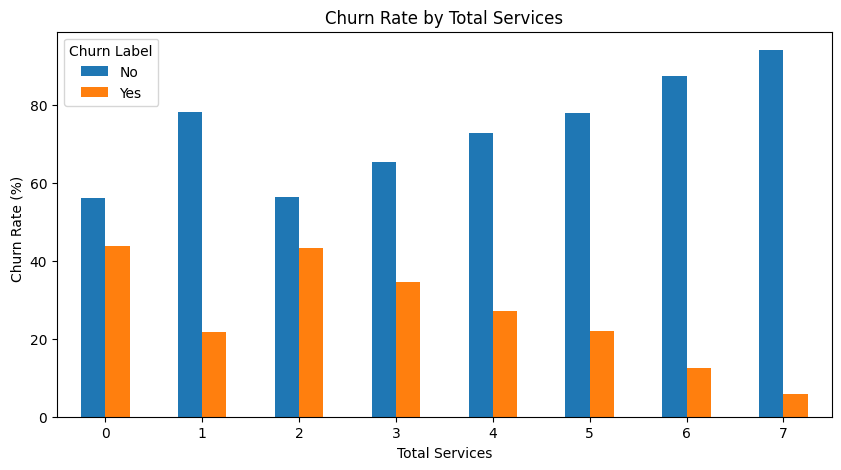

In [29]:
df['Total Services'] = df[['Phone Service','Internet Service','Online Security',
                          'Online Backup','Device Protection','Tech Support','Streaming TV',
                          'Streaming Movies']].eq('Yes').sum(axis=1)

(pd.crosstab(df['Total Services'], df['Churn Label'], normalize='index') * 100).round(3).plot(kind='bar', figsize=(10,5))
plt.title('Churn Rate by Total Services')
plt.ylabel('Churn Rate (%)  ')
plt.xticks(rotation=0)

There is a clear inverse relationship between the number of services a customer uses and their likelihood to leave; churn drops from over 40% for those with 0–2 services to roughly 5% for those with 7 services.

## Correlation Analysis

In [30]:
corr_cols = ['Tenure Months','Monthly Charges','Total Charges','Total Services','CLTV','Churn Value','Churn Score']

# df[corr_cols].corr()


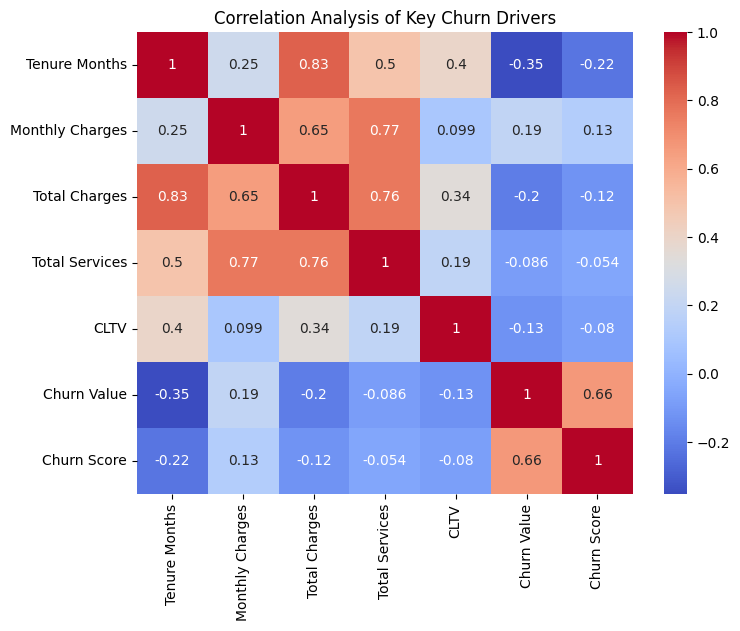

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Analysis of Key Churn Drivers')
plt.show()

1) **Tenure vs. Total Charges** :0.83 (Strong +)
\
Long-term customers are the primary revenue drivers.

2) **Monthly Charges vs. Total Services**: 0.77 (Strong +)
\
Upselling more services directly increases monthly revenue but may increase churn risk.

3) **Churn Score vs. Churn Value**: 0.66 (Strong +)
\
Churn prediction model is reliable and should be used for proactive outreach.

4) **Tenure vs. Churn Value** : -0.35 (Moderate -)
\
The risk of churn drops as a customer stays longer; focus on the onboarding phase.

## Outlier Detection

In [32]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason', 'Tenure Months Buckets',
       'Monthly Charges Buckets', 'Total Charges Bucket', 'Total Services'],
      dtype='object')

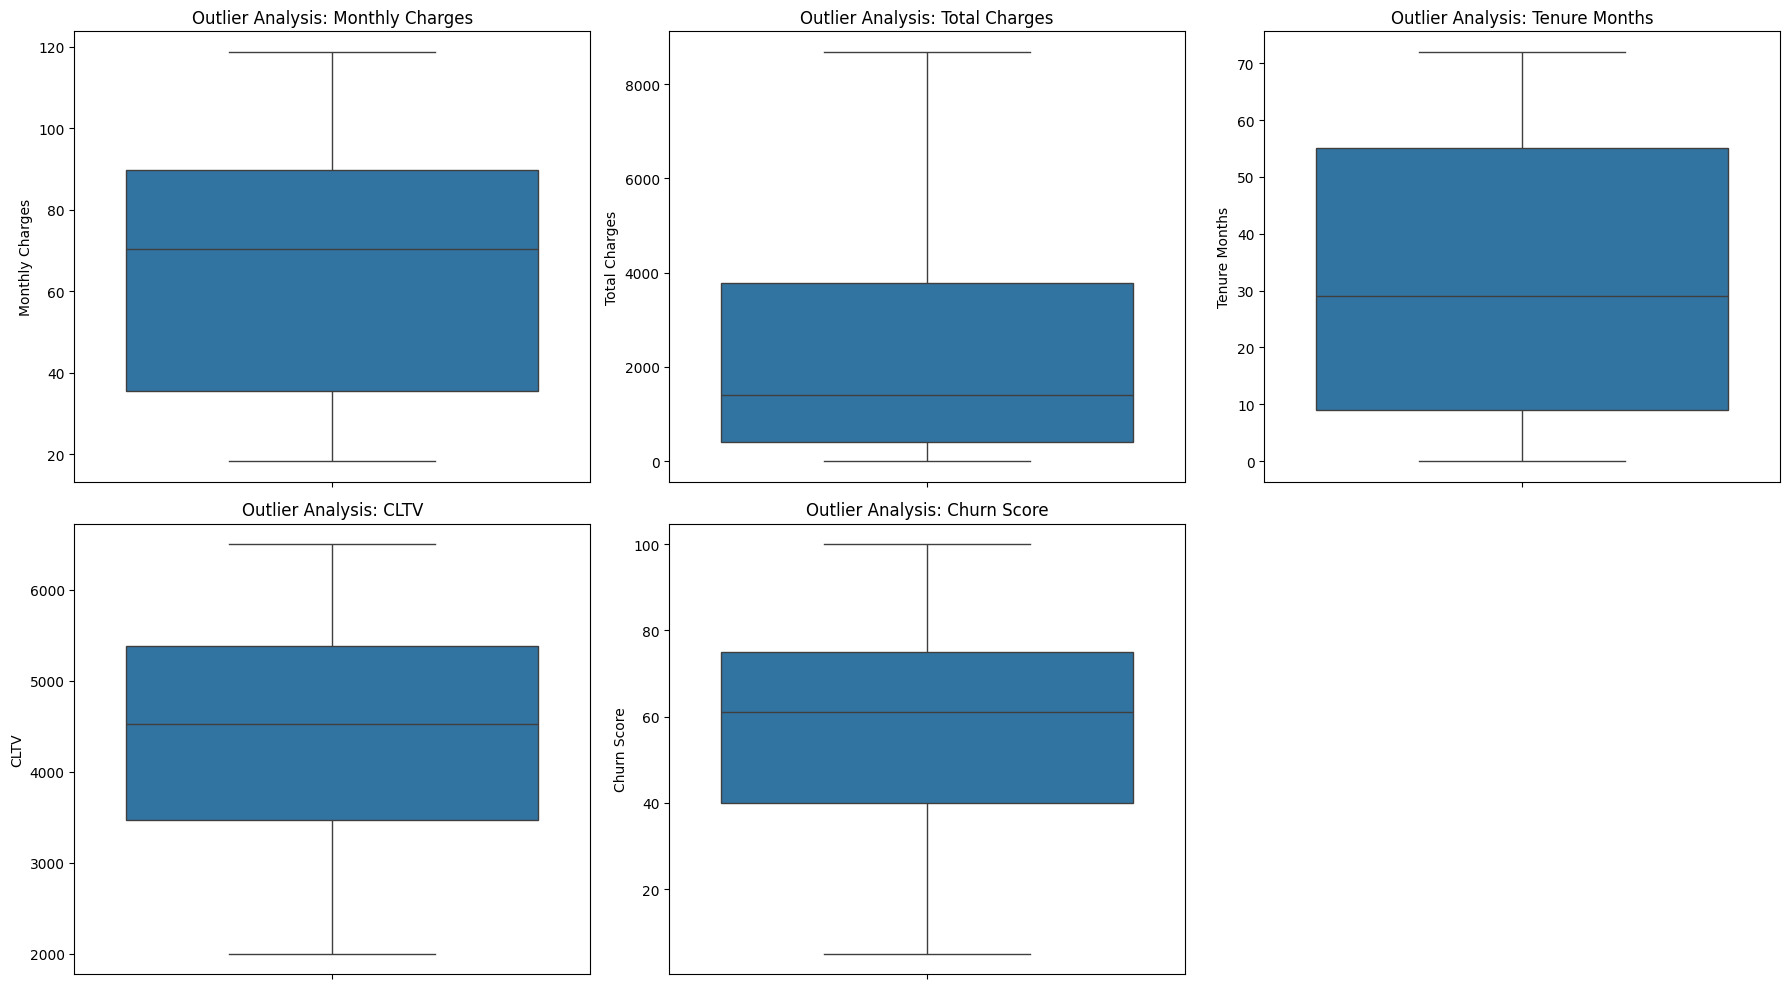

In [51]:
# List of high-impact numeric columns
high_impact_cols = ['Monthly Charges','Total Charges','Tenure Months','CLTV','Churn Score']

plt.figure(figsize=(18, 10))

# Loop through columns and create subplots
for i, col in enumerate(high_impact_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier Analysis: {col}')
    plt.ylabel(col)


plt.tight_layout()
plt.show()


In [57]:
# Saving df for further analysis using powerbi

customer_churn_eda = df.copy()
customer_churn_eda.to_csv("customer_churn_eda.csv", index=False)


# **ML Modeling**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


## Drop Identifier & Leakage Columns

In [35]:
drop_cols = ['CustomerID','Count','Churn Label','Churn Score','Churn Reason','Lat Long','Zip Code']

df_model = df.drop(columns = drop_cols)


## Define Target & Features

In [36]:
TARGET = 'Churn Value'

X = df_model.drop(TARGET, axis=1)
y = df_model[TARGET]


## Define Column Groups

In [37]:
categorical_cols = ['Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service',
    'Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract',
    'Paperless Billing','Payment Method','Country','State','Tenure Months Buckets','Monthly Charges Buckets','Total Charges Bucket']

In [38]:
numerical_cols = ['Tenure Months','Monthly Charges','Total Charges','Latitude','Longitude','CLTV','Total Services']

## Train-Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

## Preprocessing Using ColumnTransformer

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='drop'
)


## Create Pipeline with Model

In [41]:
pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('model', LogisticRegression(max_iter=1000))
    ]
)


## Train Model

In [42]:
pipeline.fit(X_train, y_train)
# note: Test data is NOT touched here.

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges', 'Latitude',
                                                   'Longitude', 'CLTV',
                                                   'Total Services']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Senior Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method', 'Country',
                                                   'State',
                                                   'Tenure Months Buckets',
                                                   'Monthly Charges Buckets',
                                                   'Total Charges Bucket'])])),
                ('model', LogisticRegression(max_iter=1000))])

## Model Evaluation

In [43]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# For churn, recall is more important
# Missing a churner = lost customer.


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC: 0.8526725051021726


## Random Forest Pipeline

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('model', RandomForestClassifier(n_estimators=200,random_state=42))
    ]
)

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges', 'Latitude',
                                                   'Longitude', 'CLTV',
                                                   'Total Services']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Senior Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method', 'Country',
                                                   'State',
                                                   'Tenure Months Buckets',
                                                   'Monthly Charges Buckets',
                                                   'Total Charges Bucket'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

After splitting the data, I used a ColumnTransformer inside a pipeline to apply scaling to numerical features and encoding to categorical features. This ensured no data leakage and made the workflow production-ready. The model was trained and evaluated using recall and ROC-AUC since identifying churners is more critical than overall accuracy.

# **Business Recommendations**

## Convert probability --> risk level

In [45]:
def churn_risk_bucket(prob):
    if prob >= 0.75:
        return 'High Risk'
    elif prob >= 0.40:
        return 'Medium Risk'
    else:
        return 'Low Risk'


In [46]:
churn_prob = pipeline.predict_proba(X_test)[:, 1]
churn_risk_level = [churn_risk_bucket(prob) for prob in churn_prob]

## Actionable Output Table

In [47]:
results_df = X_test.copy()
results_df['Actual Churn'] = y_test.values
results_df['Churn Probability'] = churn_prob
results_df['Risk Level'] = churn_risk_level


## Automate Retention Recommendations

In [48]:
def retention_action(row):
    if row['Risk Level'] == 'High Risk':
        return 'Offer discount + contract upgrade'
    elif row['Risk Level'] == 'Medium Risk':
        return 'Send personalized engagement offer'
    else:
        return 'Loyalty reward / no action'


In [49]:
results_df['Retention Action'] = results_df.apply(retention_action, axis=1)


In [50]:
results_df

,Country,State,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Total Charges,CLTV,Tenure Months Buckets,Monthly Charges Buckets,Total Charges Bucket,Total Services,Actual Churn,Churn Probability,Risk Level,Retention Action
2196,United States,California,Barstow,34.965648,-117.001509,Male,No,Yes,No,72,...,8468.20,4842,NaN,Very High (<120),<9000,7,0,0.030254,Low Risk,Loyalty reward / no action
3549,United States,California,Somis,34.297628,-119.014627,Female,Yes,No,No,8,...,908.55,5157,6-12 months,Very High (<120),<2000,4,0,0.708305,Medium Risk,Send personalized engagement offer
3515,United States,California,Anaheim,33.850452,-117.726668,Female,No,Yes,No,41,...,3211.20,2894,3-4 years,Medium (<80),<4000,5,0,0.099332,Low Risk,Loyalty reward / no action
5162,United States,California,Copperopolis,37.943954,-120.671080,Male,No,Yes,No,18,...,1468.75,2831,1-2 years,Medium (<80),<2000,3,0,0.402015,Medium Risk,Send personalized engagement offer
4642,United States,California,Hesperia,34.361387,-117.337509,Female,No,Yes,No,72,...,5919.35,4324,NaN,High (<100),<6000,6,0,0.010443,Low Risk,Loyalty reward / no action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,United States,California,La Crescenta,34.239636,-118.245259,Female,No,Yes,Yes,49,...,4345.00,4567,4-5 years,High (<100),<6000,7,0,0.014075,Low Risk,Loyalty reward / no action
5150,United States,California,San Jose,37.218705,-121.762429,Male,No,Yes,Yes,28,...,487.95,2948,2-3 years,Very Low (<40),<2000,1,0,0.006793,Low Risk,Loyalty reward / no action
4708,United States,California,Newport Beach,33.634626,-117.874882,Male,No,No,No,5,...,93.55,5597,0-6 months,Very Low (<40),<2000,1,0,0.200287,Low Risk,Loyalty reward / no action
5381,United States,California,Sacramento,38.512569,-121.495184,Female,No,No,No,56,...,1051.90,4831,4-5 years,Very Low (<40),<2000,1,0,0.011677,Low Risk,Loyalty reward / no action
